# The basics of Poliastro library

## Libraries

In [373]:
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.core.elements import eccentricity_vector,rv_pqw
from poliastro.plotting import OrbitPlotter2D
from poliastro.maneuver import Maneuver
from poliastro.examples import iss
from poliastro.constants import GM_earth
k = GM_earth.value

and other libraries...

In [2]:
from IPython.display import clear_output
from time import sleep
from prettytable import PrettyTable
from astropy import units as u

## Orbits

In [180]:
"""Defining two orbits by their position and velocity vectors"""


r = [-6045., -3490.,  2500.] << u.km
v = [-3.557, 6.718, 2.633] << u.km / u.s

r_1= [-6045, -3490, 2500]<< u.km
v_1= [-3.457, 6.618, 2.533]<< u.km/u.s

nostromo = Orbit.from_vectors(Earth, r, v)
planet_express=Orbit.from_vectors(Earth, r_1, v_1)

In [184]:
nostromo.r.value

array([-6045., -3490.,  2500.])

In [6]:
nostromo.period.value

14820.644854658023

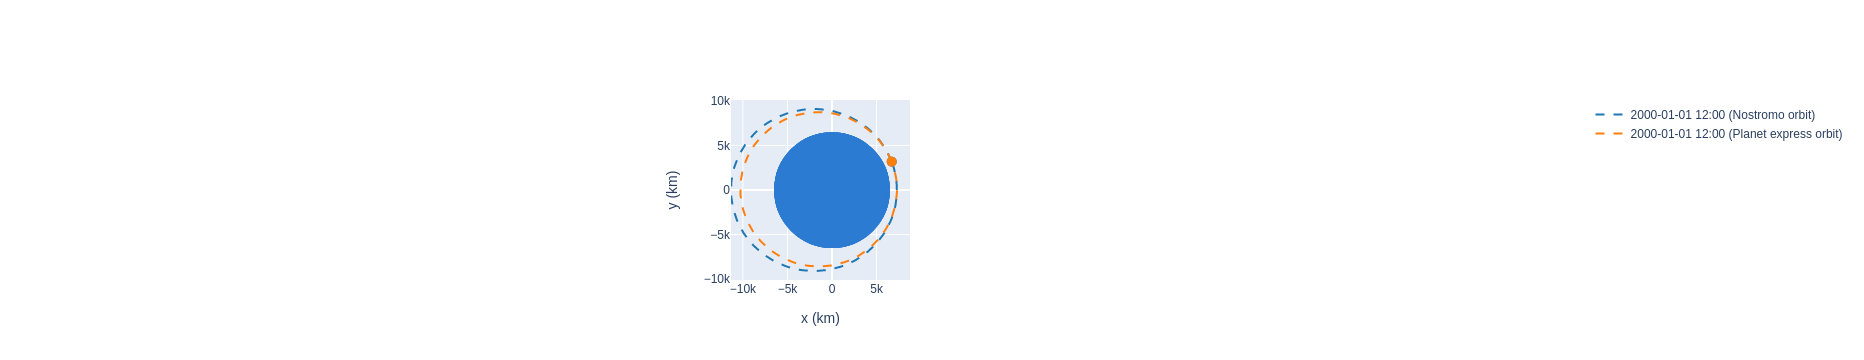

In [165]:
op = OrbitPlotter2D()
op.plot(nostromo, label="Nostromo orbit")
op.plot(planet_express, label="Planet express orbit")

In [119]:
a = 1.523679 << u.AU
ecc = 0.093315 << u.one
inc = 8.0 << u.deg
raan = 49.562 << u.deg
argp = 286.537 << u.deg
nu = 23.33 << u.deg

nostromo = Orbit.from_classical(Earth, a, ecc, inc, raan, argp, nu)

In [125]:
a = 1.523679 << u.AU
ecc = 0.093315 << u.one
inc = 1.85 << u.deg
raan = 150.562 << u.deg
argp = 286.537 << u.deg
nu = 23.33 << u.deg

planet_express = Orbit.from_classical(Earth, a, ecc, inc, raan, argp, nu)

In [84]:
def vect_l(vector):
    return np.sqrt(sum([x**2 for x in vector]))

In [179]:
vect_nostromo=eccentricity_vector(k,r,v)
vect_planet_express=eccentricity_vector(k,r_1,v_1)
n_p=nostromo.r_a.value
n_p2=planet_express.r_a.value
perigee_vector_diff=vect_l(n_p*vect_nostromo-n_p2*vect_planet_express)
perigee_vector_diff

1044.977756107532

## Time and maneuvers

In [419]:
planet_express=planet_express.propagate(10<<u.min)
ecc=planet_express.ecc
nu=planet_express.nu
p=planet_express.p
r, v = rv_pqw(k, p, ecc, nu)
eccentricity_vector(k,r,v)

array([ 1.71211182e-01, -9.79991387e-17,  0.00000000e+00])

In [376]:
eccentricity_vector(k,r,v)

array([0.17121118, 0.        , 0.        ])

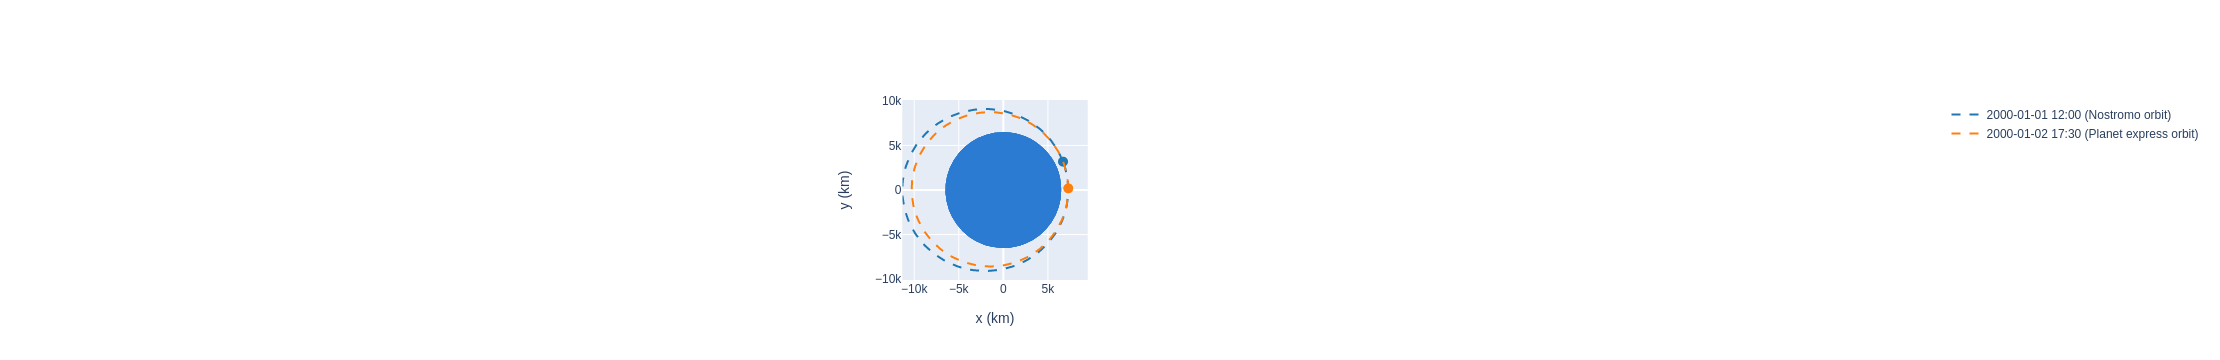

In [371]:
op = OrbitPlotter2D()
op.plot(nostromo, label="Nostromo orbit")
op.plot(planet_express, label="Planet express orbit")

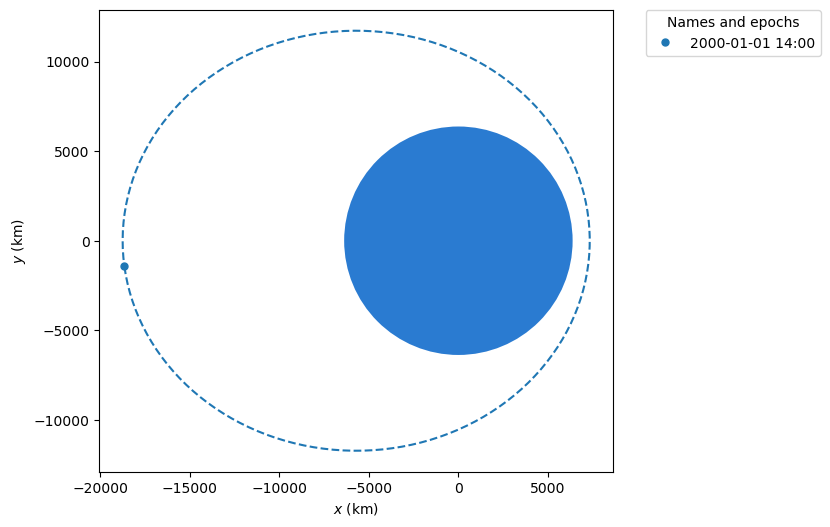

In [10]:
new_orbit.plot();

In [14]:
# Appliying an impulse defined by vector dv, and getting the new orbit
dv = [500, 40, 0] << (u.m / u.s)
imp = Maneuver.impulse(dv)

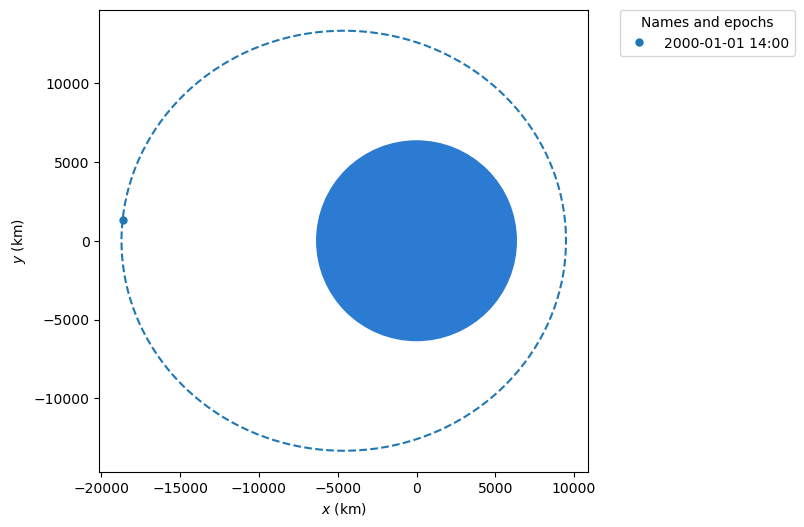

In [15]:
orb_f = new_orbit.apply_maneuver(imp)
orb_f.plot();

## Example

In [14]:
def ground_check(orbit):    
    perigee=orbit.a*(1-orbit.ecc) 
    radius=6371<< u.km   
    if perigee<=radius:
        return True    
    return False

In [15]:
def print_frames(frames):   
    for i, frame in enumerate(frames): 
        clear_output(wait=True)
        if frame['crash']:
            print("=====================================================================================")
            print("========================================CRASH========================================")
            print("=====================================================================================")
            break
        else:
            myTable = PrettyTable(["Values","Planet Express", "Nostromo","Difference"])
            myTable.add_row(["Semi-major axis", frame['frame'].a, nostromo.a,frame['frame'].a-nostromo.a])
            myTable.add_row(["Eccentricity", frame['frame'].ecc, nostromo.ecc,frame['frame'].ecc-nostromo.ecc])
            myTable.add_row(["Inclination", frame['frame'].inc, nostromo.inc,frame['frame'].inc-nostromo.inc])
            print(myTable)
            print(f"Timestep: {i + 1}")
            print("Vector: ", frame["vector"])
        sleep(.4)

In [16]:
def print_frames_plot(frames):   
    for i, frame in enumerate(frames): 
        clear_output(wait=True)
        frame['frame'].plot()
        print(f"Timestep: {i + 1}")
        sleep(2)

In [18]:
STEP=20 << u.min
N_STEPS=50
frames = [] # for animation
import random

for i in range(N_STEPS):
    
    dv = [random.randint(0, 100), random.randint(0, 10), random.randint(0, 10)] << (u.m / u.s)
    
    planet_express = planet_express.apply_maneuver(Maneuver.impulse(dv))   
    planet_express = planet_express.propagate(STEP) 
    crash=ground_check(planet_express)
    frames.append({'frame':planet_express,"vector":dv,"crash":crash})

In [19]:
print_frames(frames)

========================================CRASH========================================
